<a href="https://colab.research.google.com/github/Gehlen05/Aprendizado-Maquina/blob/main/naive_bayes_respirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
df = pd.read_csv('Respira_DB_Treinamento.csv')
df.head()

,NIF,VT,RR,C
0,-24,300,24,S
1,-30,500,17,F
2,-23,300,29,S
3,-26,265,44,F
4,-18,370,32,F


In [ ]:
#Sucesso é 0 e Falha é 1
df['C'] = df['C'].apply(lambda x : 0 if x == 'S' else 1)
df.head()

,NIF,VT,RR,C
0,-24,300,24,0
1,-30,500,17,1
2,-23,300,29,0
3,-26,265,44,1
4,-18,370,32,1


In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model_naive_bayes.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.8888888888888888
Precisão:  1.0
Recall:  0.75
F1:  0.8571428571428571


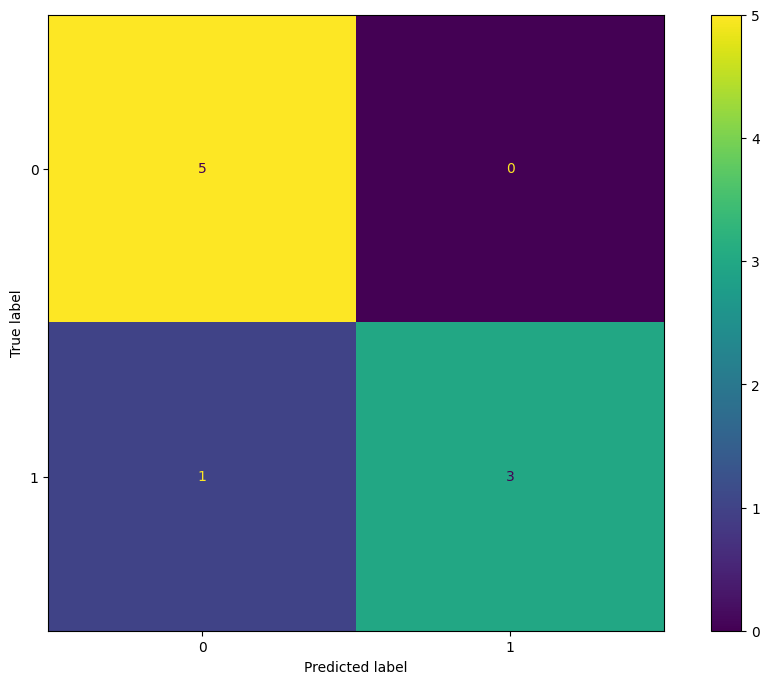

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

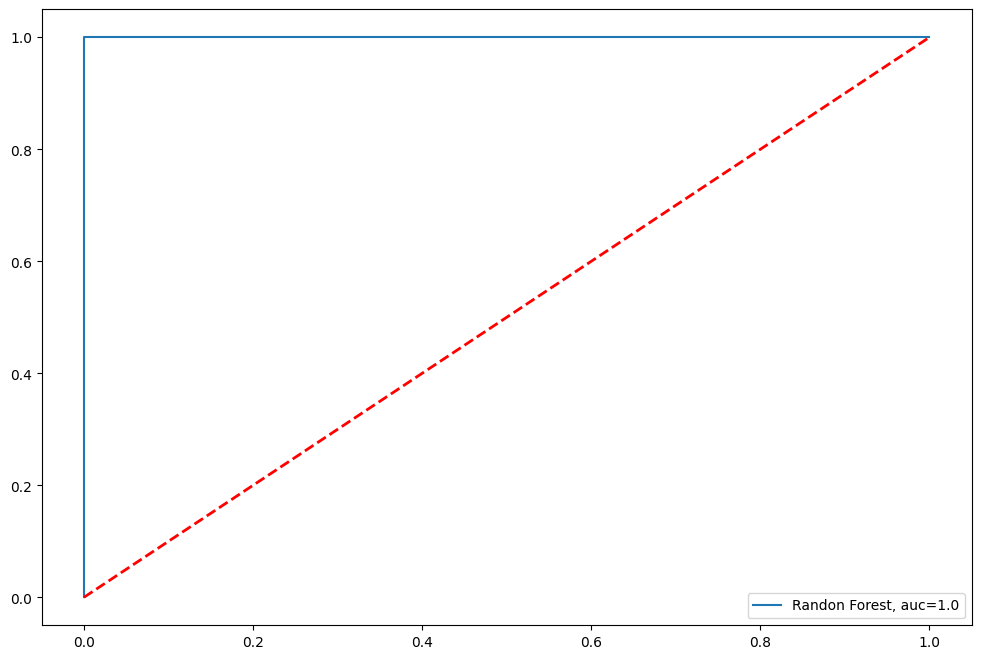

In [ ]:
y_pred_proba = model_naive_bayes.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label ="Randon Forest, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle ='--')
plt.legend(loc=4)


In [ ]:
prob_naive_bayes = model_naive_bayes.predict_proba(x_test)

In [ ]:
prob_naive_bayes

array([[9.99958646e-01, 4.13540795e-05],
       [9.99976145e-01, 2.38554625e-05],
       [2.78139092e-04, 9.99721861e-01],
       [9.99997982e-01, 2.01843209e-06],
       [1.27740134e-06, 9.99998723e-01],
       [1.18242080e-03, 9.98817579e-01],
       [9.99099682e-01, 9.00318190e-04],
       [5.24965600e-01, 4.75034400e-01],
       [9.99999626e-01, 3.73768436e-07]])

In [ ]:
data_df = pd.DataFrame(prob_naive_bayes)

In [ ]:
data_df['y_predict'] = y_pred
data_df['y_test'] = y_test

In [ ]:
data_df = data_df.rename(columns={0: 'probabilidade_0', 1: 'probabilidade_1' })

In [ ]:
data_df.head(10)

,probabilidade_0,probabilidade_1,y_predict,y_test
0,0.999959,4.135408e-05,0,0
1,0.999976,2.385546e-05,0,0
2,0.000278,9.997219e-01,1,1
3,0.999998,2.018432e-06,0,0
4,0.000001,9.999987e-01,1,1
5,0.001182,9.988176e-01,1,1
6,0.999100,9.003182e-04,0,0
7,0.524966,4.750344e-01,0,1
8,1.000000,3.737684e-07,0,0


In [ ]:
linha_diferente = data_df.loc[data_df['y_predict'] != data_df['y_test']]
print(linha_diferente)
linha_diferente = data_df['y_predict'] == data_df['y_test']
data_df['Acertos'] = linha_diferente

   probabilidade_0  probabilidade_1  y_predict  y_test
7         0.524966         0.475034          0       1


True     8
False    1
Name: Acertos, dtype: int64


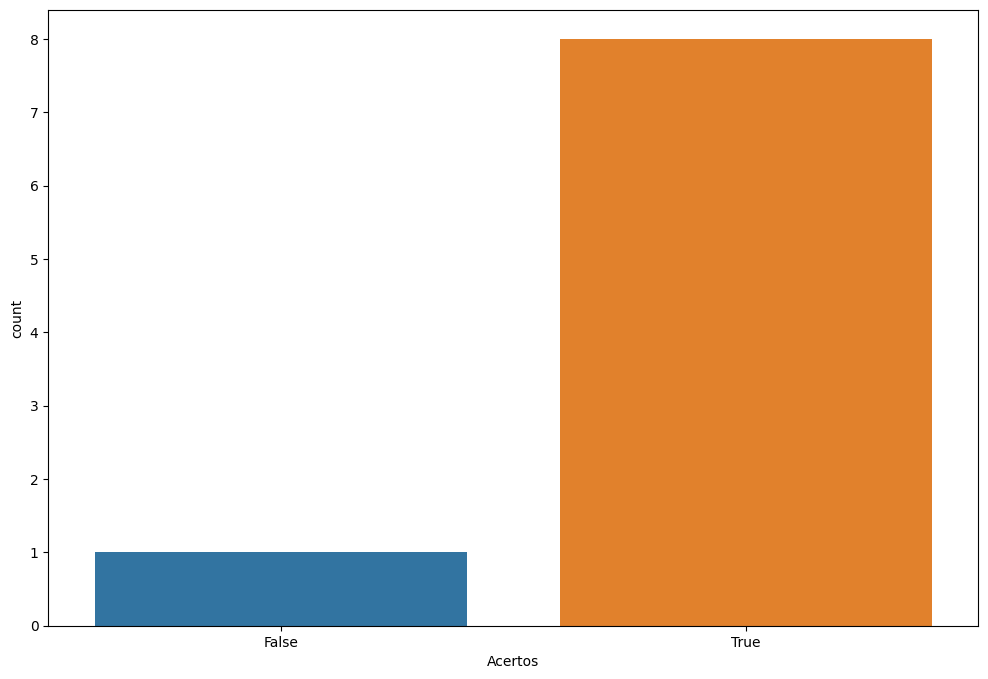

In [ ]:
target = 'Acertos'
ax = sns.countplot(x=target,data=data_df)
print(data_df[target].value_counts())